Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read Data

In [3]:
file = pd.ExcelFile("../../../../data/final/Handball_09.03.2023_fertig.xlsx")

file.sheet_names

df = file.parse('2. League')

# drop last col comments & favorite corner & empy rows at end
df = df.iloc[:, :-1]
df.columns


Index(['Home team', 'Guest team', 'Matchday', 'Player 3rd league',
       'Shooter team', 'Game Minute',
       'Difference between\nfinal whistle and kickoff \n(in seconds)',
       'Home Goal', 'Guest Goal',
       'Goalkeeper position\n(0 = on the line;\n 1 = in front of the line)',
       'Goalkeeper name', 'Goalkeeper Club', 'Goalkeeper \nheight (cm)',
       'Thrower \nheight (cm)',
       'Toss successful?\n(0 = no; 1 = yes;\n 2 = yes, afterthrow',
       'Left/right \nhanded?\n(1 = right; 2 = left)', 'Throw direction',
       'Pressure situation?\n(0 = no; \n1= Goalkeeper change;\n2 = last 7 meter held; 3 = goal difference < 4 + from 50. minute; 4 = 1+2; 5 = 1+3; 6 = 2+3; 7 = 1+2+3; 8 = last 7 meter successful in follow-up throw\n',
       'Number of seven meters\n(of the player)',
       'Throw quadrant last 7 meter',
       'last 7 meter successful?\n(0 = no; 1 = yes; \n2 = yes, in the afterthrow'],
      dtype='object')

Cleanup & Renaming

In [4]:
df.replace('unklar', np.nan,inplace=True)
df.replace('unklar ', np.nan,inplace=True)
df.replace('fehlend', np.nan,inplace=True)
df.replace('-', np.nan,inplace=True)
df.replace(-99, np.nan,inplace=True)
df.replace('-99', np.nan,inplace=True)
#df.dropna(inplace=True)
df.columns = [ 'homeTeam','opponentTeam','day','name','team','playTime',
              'whistleThrowTime','homeGoals','opponentGoals',
              'goalKeeperPosition','goalKeeperName', 
              'goalkeeperTeam','goalKeeperHeightCM','shooterheightCM',
              'throwSuccess','LRHandy','throwDirection',
              'pressureSituation','noOfThrowsFromPlayer',
              'throwQuadrantLastThrow','lastThrowSuccess']
df = df.astype({'homeTeam':'string', 'opponentTeam':'string','day':'float16','name':'string','team':'string','playTime':'float16',
              'whistleThrowTime':'float16','homeGoals':'float16','opponentGoals':'float16','goalKeeperPosition':'float16',
              'goalKeeperName':'string','goalkeeperTeam':'string', 'goalKeeperHeightCM':'float16','shooterheightCM':'float16',
              'throwSuccess':'float16','LRHandy':'float16','throwDirection':'float16','pressureSituation':'float16','noOfThrowsFromPlayer':'float16',
              'throwQuadrantLastThrow':'float16','lastThrowSuccess':'float16', })
df

,homeTeam,opponentTeam,day,name,team,playTime,whistleThrowTime,homeGoals,opponentGoals,goalKeeperPosition,...,goalkeeperTeam,goalKeeperHeightCM,shooterheightCM,throwSuccess,LRHandy,throwDirection,pressureSituation,noOfThrowsFromPlayer,throwQuadrantLastThrow,lastThrowSuccess
0,EHV Aue,TUSEM Essen,1.0,Noah Beyer,TUSEM Essen,10.0,NaN,5.0,3.0,NaN,...,EHV Aue,192.0,180.0,1.0,1.0,3.0,0.0,1.0,NaN,NaN
1,EHV Aue,TUSEM Essen,1.0,Noah Beyer,TUSEM Essen,15.0,NaN,8.0,4.0,NaN,...,EHV Aue,192.0,180.0,1.0,1.0,9.0,0.0,2.0,3.0,1.0
2,EHV Aue,TUSEM Essen,1.0,Noah Beyer,TUSEM Essen,34.0,NaN,15.0,14.0,NaN,...,EHV Aue,185.0,180.0,0.0,1.0,2.0,0.0,3.0,9.0,1.0
3,EHV Aue,TUSEM Essen,1.0,Noah Beyer,TUSEM Essen,39.0,NaN,18.0,17.0,NaN,...,EHV Aue,185.0,180.0,1.0,1.0,8.0,2.0,4.0,2.0,2.0
4,EHV Aue,TUSEM Essen,1.0,Noah Beyer,TUSEM Essen,43.0,NaN,19.0,19.0,NaN,...,EHV Aue,185.0,180.0,1.0,1.0,7.0,0.0,5.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,VfL Lübeck-Schwartau,TV Emsdetten,7.0,Dirk Holzner,TV Emsdetten,22.0,35.0,7.0,7.0,1.0,...,VfL Lübeck-Schwartau,210.0,180.0,1.0,1.0,3.0,0.0,3.0,8.0,1.0
223,VfL Lübeck-Schwartau,TV Emsdetten,7.0,Dirk Holzner,TV Emsdetten,36.0,28.0,14.0,12.0,1.0,...,VfL Lübeck-Schwartau,195.0,180.0,0.0,1.0,2.0,1.0,4.0,3.0,1.0
224,VfL Lübeck-Schwartau,TV Emsdetten,7.0,Dirk Holzner,TV Emsdetten,39.0,26.0,15.0,14.0,1.0,...,VfL Lübeck-Schwartau,195.0,180.0,1.0,1.0,9.0,4.0,5.0,2.0,0.0
225,VfL Lübeck-Schwartau,TV Emsdetten,7.0,Dirk Holzner,TV Emsdetten,50.0,97.0,21.0,17.0,1.0,...,VfL Lübeck-Schwartau,210.0,180.0,1.0,1.0,6.0,3.0,6.0,9.0,1.0


In [5]:
df = df.loc[:,('name','throwDirection','throwSuccess')].copy()
df.dropna(inplace=True)
df['throwSuccess'].replace(2.0, 1.0,inplace=True)

#df1 =pd.crosstab(df['name'], df['throwDirection'], margins=True, margins_name="Total") 
df1 =pd.crosstab(df['name'], df['throwDirection'],) 
df1

throwDirection,1.0,2.0,3.0,4.0,6.0,7.0,8.0,9.0
name,,,,,,,,
Dirk Holzner,1,2,1,0,1,0,1,3
Fynn Hangstein,6,5,3,2,1,21,6,33
Noah Beyer,8,3,15,5,5,13,19,26


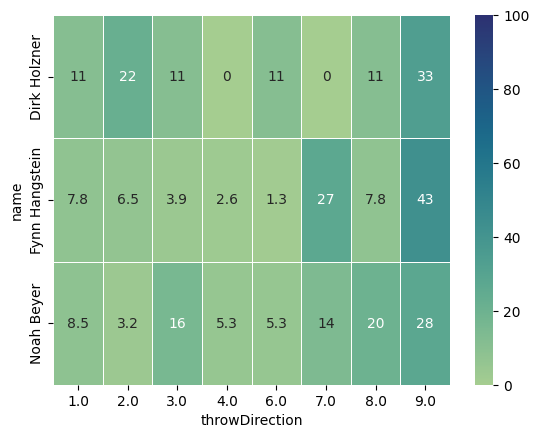

In [6]:
ax = sns.heatmap(pd.crosstab(df['name'], df['throwDirection'], normalize='index')*100, linewidth=0.5, annot=True, cmap="crest",vmin=0,vmax=100)
#ax.xaxis.tick_top()
plt.show()

In [7]:
df2 =pd.crosstab(df['name'], df['throwSuccess']) 
df2

throwSuccess,0.0,1.0
name,,
Dirk Holzner,3,6
Fynn Hangstein,13,64
Noah Beyer,15,79


In [8]:
df3 = pd.crosstab([df['name'],df['throwDirection']], df['throwSuccess']) 
pd.set_option("display.max_rows", None, "display.max_columns", None)
df3

throwSuccess                   0.0  1.0
name           throwDirection          
Dirk Holzner   1.0               1    0
               2.0               1    1
               3.0               0    1
               6.0               0    1
               8.0               0    1
               9.0               1    2
Fynn Hangstein 1.0               0    6
               2.0               2    3
               3.0               0    3
               4.0               0    2
               6.0               0    1
               7.0               4   17
               8.0               0    6
               9.0               7   26
Noah Beyer     1.0               0    8
               2.0               1    2
               3.0               3   12
               4.0               1    4
               6.0               1    4
               7.0               1   12
               8.0               3   16
               9.0               5   21

In [9]:
df3 = pd.crosstab([df['name'],df['throwDirection']], df['throwSuccess']) 
pd.set_option("display.max_rows", None, "display.max_columns", None)
df3

throwSuccess                   0.0  1.0
name           throwDirection          
Dirk Holzner   1.0               1    0
               2.0               1    1
               3.0               0    1
               6.0               0    1
               8.0               0    1
               9.0               1    2
Fynn Hangstein 1.0               0    6
               2.0               2    3
               3.0               0    3
               4.0               0    2
               6.0               0    1
               7.0               4   17
               8.0               0    6
               9.0               7   26
Noah Beyer     1.0               0    8
               2.0               1    2
               3.0               3   12
               4.0               1    4
               6.0               1    4
               7.0               1   12
               8.0               3   16
               9.0               5   21

Playerwise Successfull Throw

In [10]:
dfs = df.loc[df['throwSuccess'] == 1]
dfs
dfscs =pd.crosstab(dfs['name'], dfs['throwDirection'], margins=True, margins_name="Total") 
dfscs

throwDirection,1.0,2.0,3.0,4.0,6.0,7.0,8.0,9.0,Total
name,,,,,,,,,
Dirk Holzner,0,1,1,0,1,0,1,2,6
Fynn Hangstein,6,3,3,2,1,17,6,26,64
Noah Beyer,8,2,12,4,4,12,16,21,79
Total,14,6,16,6,6,29,23,49,149


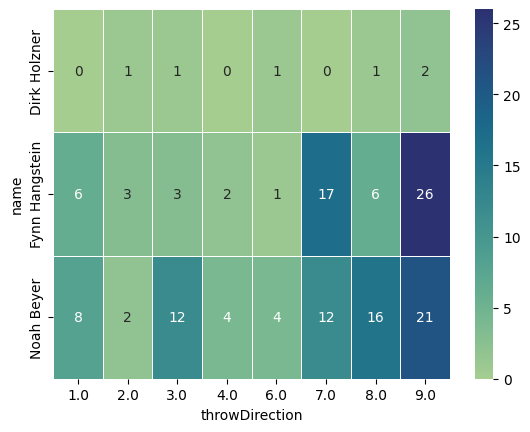

In [11]:
axs = sns.heatmap(pd.crosstab(dfs['name'], dfs['throwDirection']), linewidth=0.5, annot=True, cmap="crest")
#ax.xaxis.tick_top()
plt.show()

Playerwise Failed Throws

In [12]:
dff = df.loc[df['throwSuccess'] == 0]
dff
dffcs =pd.crosstab(dff['name'], dff['throwDirection'], margins=True, margins_name="Total") 
dffcs

throwDirection,1.0,2.0,3.0,4.0,6.0,7.0,8.0,9.0,Total
name,,,,,,,,,
Dirk Holzner,1,1,0,0,0,0,0,1,3
Fynn Hangstein,0,2,0,0,0,4,0,7,13
Noah Beyer,0,1,3,1,1,1,3,5,15
Total,1,4,3,1,1,5,3,13,31


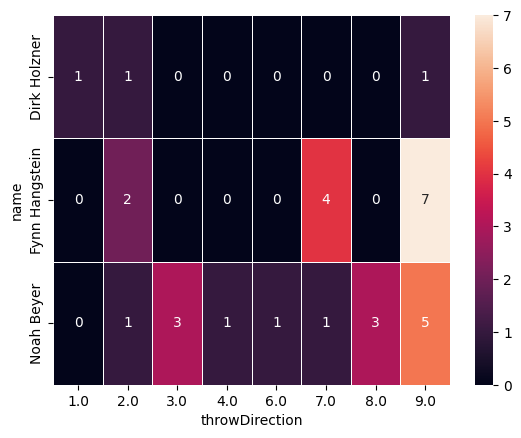

In [13]:
axf = sns.heatmap(pd.crosstab(dff['name'], dff['throwDirection']), linewidth=0.5, annot=True)
#ax.xaxis.tick_top()
plt.show()

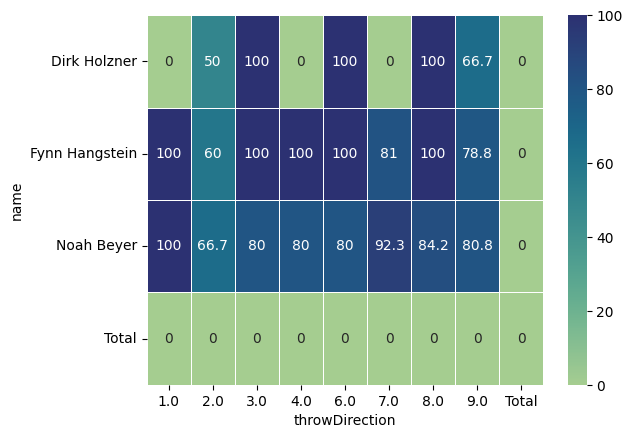

throwDirection,1.0,2.0,3.0,4.0,6.0,7.0,8.0,9.0,Total
name,,,,,,,,,
Dirk Holzner,0.0,50.000000,100.0,0.0,100.0,0.000000,100.000000,66.666667,0.0
Fynn Hangstein,100.0,60.000000,100.0,100.0,100.0,80.952381,100.000000,78.787879,0.0
Noah Beyer,100.0,66.666667,80.0,80.0,80.0,92.307692,84.210526,80.769231,0.0
Total,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0


In [14]:
relSuccess = dfscs/df1*100
relSuccess.apply(np.floor)
relSuccess.replace(np.nan,0,inplace=True)
axrs = sns.heatmap(relSuccess, linewidth=0.5, annot=True, cmap="crest",fmt='.3g')
#ax.xaxis.tick_top()
plt.show()
relSuccess